In [6]:
import seaborn as sns
import os
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

In [2]:
os.chdir(r"C:\Users\Senorita\Downloads")
data = pd.read_csv("train.csv")
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
data.shape

(891, 12)

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [9]:
data.isnull()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,False,False,False,False,False,False,False,False,False,False,True,False
1,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,True,False
3,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...
886,False,False,False,False,False,False,False,False,False,False,True,False
887,False,False,False,False,False,False,False,False,False,False,False,False
888,False,False,False,False,False,True,False,False,False,False,True,False
889,False,False,False,False,False,False,False,False,False,False,False,False


In [10]:
data.dropna(subset=['Embarked'],inplace=True)
data['Age'].fillna(data['Age'].median(),inplace=True)

In [12]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [14]:
missing=data[data["Cabin"].isnull()]
missing=missing[["Pclass","Cabin"]]
missing

,Pclass,Cabin
0,3,NaN
2,3,NaN
4,3,NaN
5,3,NaN
7,3,NaN
...,...,...
884,3,NaN
885,3,NaN
886,2,NaN
888,3,NaN


In [15]:
data["Cabin"].fillna("No Cabin",inplace=True)
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,No Cabin,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,No Cabin,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,No Cabin,S


In [16]:
#UNIVARIATE ANALYSIS

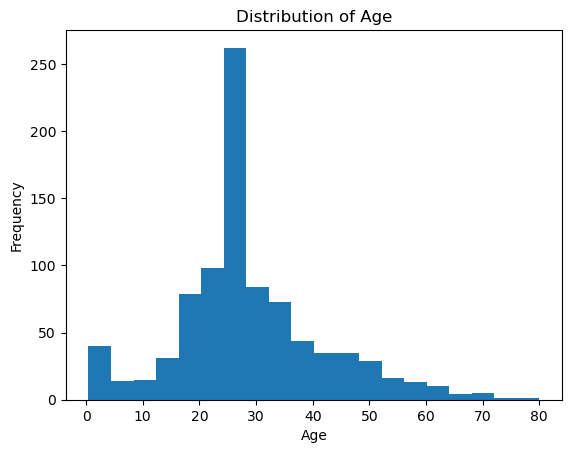

In [19]:
plt.hist(data["Age"],bins=20)
plt.xlabel("Age")
plt.ylabel("Frequency")
plt.title("Distribution of Age")
plt.show()

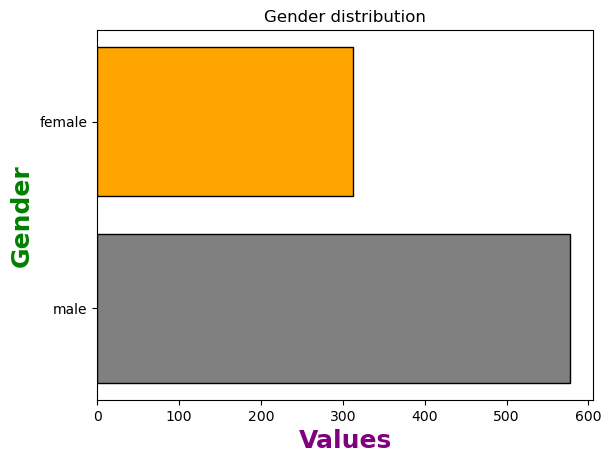

In [20]:
gender = list(data.Sex.unique())
values = list(data.Sex.value_counts())
y_pos = np.arange(len(values))
 
# Create bars
plt.barh(y_pos, values, color=['grey','orange'], edgecolor='black')
 
# Create names on the x-axis
plt.yticks(y_pos, gender)

plt.xlabel('Values', fontweight='bold', color = 'purple', fontsize='18')
plt.ylabel('Gender', fontweight='bold', color = 'green', fontsize='18')
plt.title("Gender distribution")
# Show graphic
plt.show()

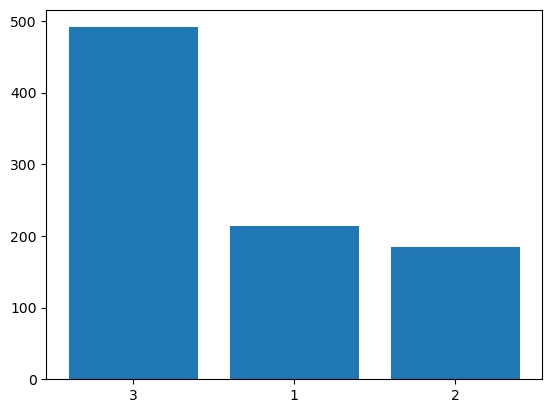

In [26]:
pclass = list(data.Pclass.unique())
values = list(data.Pclass.value_counts())

y_pos = np.arange(len(values))
 
# Create bars
plt.bar(y_pos, values)
 
# Create names on the x-axis
plt.xticks(y_pos, pclass)
 
# Show graphic
plt.show()

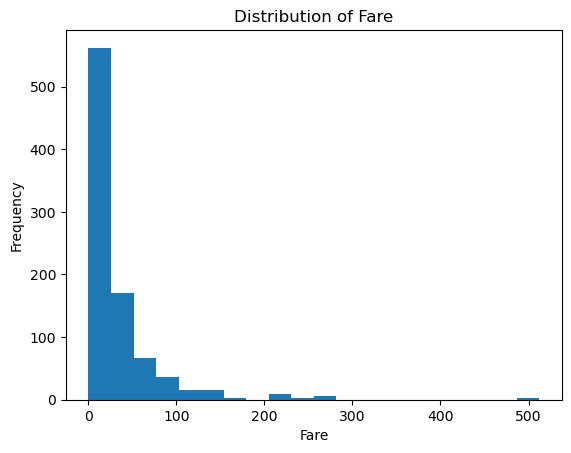

In [25]:
plt.hist(data["Fare"],bins=20)
plt.xlabel("Fare")
plt.ylabel("Frequency")
plt.title("Distribution of Fare")
plt.show()

In [ ]:
#Bivariate Analysis 

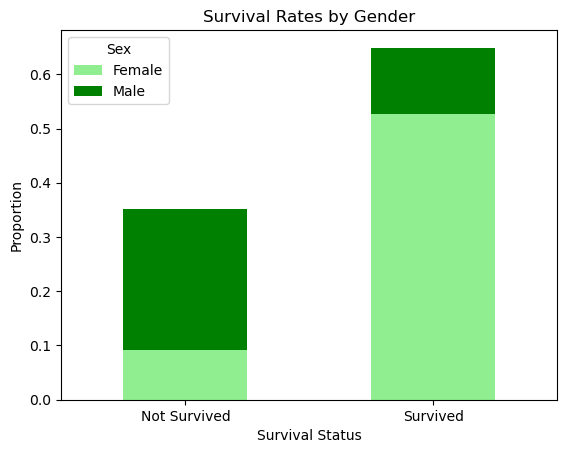

In [24]:
import matplotlib.pyplot as plt
import pandas as pd

# Calculate survival rates by gender
survival_rates = data.groupby(['Sex', 'Survived']).size().unstack() / len(data)

# Plotting
survival_rates.plot(kind='bar', stacked=True, color=['lightgreen', 'green'])
plt.xticks([0, 1], ["Not Survived", "Survived"], rotation=0)
plt.xlabel("Survival Status")
plt.ylabel("Proportion")
plt.title("Survival Rates by Gender")
plt.legend(title='Sex',labels=["Female","Male"])
plt.show()


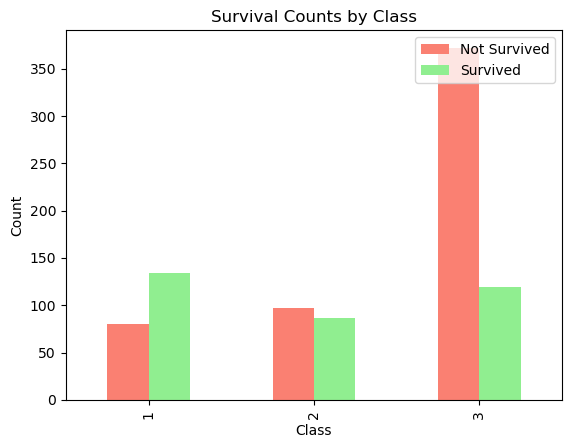

In [40]:
survival=data.groupby(["Pclass","Survived"]).size().unstack()
survival.plot(kind="bar",stacked=False,color=["salmon","lightgreen"])
plt.xlabel("Class")
plt.ylabel("Count")
plt.title("Survival Counts by Class")
plt.legend(["Not Survived","Survived"],loc="upper right")
plt.show()

In [ ]:
#Correlation between numerical values

No of numerical fetures: 7 

Index(['PassengerId', 'Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare'], dtype='object')


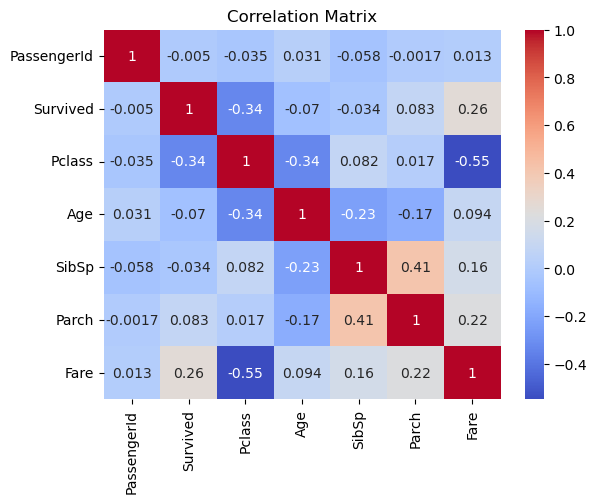

In [43]:
num_features = data.dtypes[data.dtypes != 'object'].index
print('No of numerical fetures:',len(num_features),'\n')
print(num_features)

corr_matrix=data[num_features].corr()
sns.heatmap(corr_matrix,annot=True,cmap="coolwarm")
plt.title("Correlation Matrix")
plt.show()

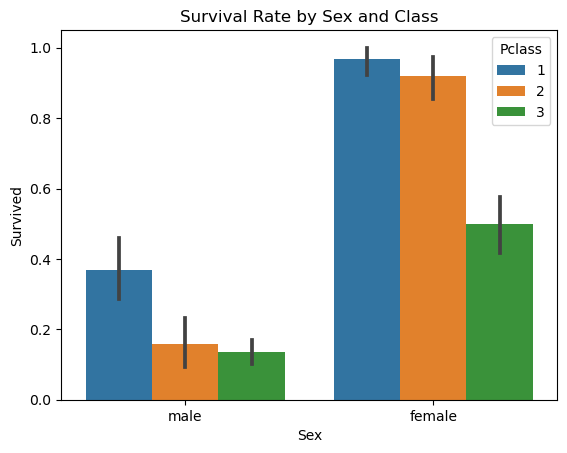

In [46]:
# Survival rate by Sex and Class
sns.barplot(x='Sex', y='Survived', hue='Pclass', data=data)
plt.title('Survival Rate by Sex and Class')
plt.show()
